In [1]:
%pylab inline

import scanpy as sc
import pandas as pd
from pysctransform.pysctransform import vst
from pysctransform.plotting import plot_fit, plot_residual_var, compare_with_sct

Populating the interactive namespace from numpy and matplotlib


In [3]:
sct_clusters = pd.read_csv("/gpfs/commons/home/schoudhary/github/sctransform2_figures/Figures_v3/pbmc3k_seurat_clusters.csv", index_col=0)
sct_clusters.columns = ["sct_cluster"]
sct_clusters.sct_cluster = sct_clusters.sct_cluster.astype(str)
sct_clusters

,sct_cluster
AAACATACAACCAC-1,4
AAACATTGAGCTAC-1,2
AAACATTGATCAGC-1,1
AAACCGTGCTTCCG-1,5
AAACCGTGTATGCG-1,6
...,...
TTTCGAACTCTCAT-1,3
TTTCTACTGAGGCA-1,2
TTTCTACTTCCTCG-1,2
TTTGCATGAGAGGC-1,2


In [4]:
pbmc3k = sc.read_h5ad("../data/pbmc3k.h5ad")
pbmc3k.obs["seurat_clusters"] = sct_clusters

vst_glmgp_3k = vst(
    pbmc3k.X.T,
    gene_names=pbmc3k.var_names.tolist(),
    cell_names=pbmc3k.obs_names.tolist(),
    fit_type="glmgp",
    n_cells=None,
    n_genes=2000,
)

[0.37761239]
[0.37761239]
[0.37761239]


In [8]:
residuals_sct = pd.read_csv("/gpfs/commons/home/schoudhary/github/sctransform2_figures/Figures_v3/pbmc3k_seurat_glmgp_scale_data.csv", index_col=0).T


In [9]:
gene_attr = vst_glmgp_3k["gene_attr"]
gene_attr = gene_attr.sort_values(by=["residual_variance"], ascending=False)
highly_variable = gene_attr.index[:3000].tolist()

In [10]:
highly_variable_common = set(highly_variable).intersection(residuals_sct.columns)
len(highly_variable_common)

2921

[0.36816]
[0.36816]
[0.36816]


... storing 'seurat_clusters' as categorical


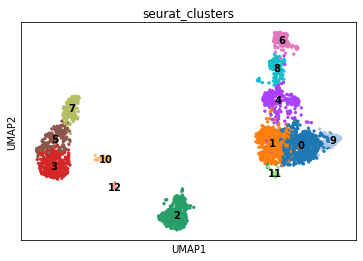

In [18]:
pbmc3k = sc.read_h5ad("../data/pbmc3k.h5ad")
pbmc3k.obs["seurat_clusters"] = sct_clusters

vst_glmgp_3k = vst(
    pbmc3k.X.T,
    gene_names=pbmc3k.var_names.tolist(),
    cell_names=pbmc3k.obs_names.tolist(),
    fit_type="glmgp",
    n_cells=None,
    n_genes=2000,
)
gene_attr = vst_glmgp_3k["gene_attr"]
gene_attr = gene_attr.sort_values(by=["residual_variance"], ascending=False)
highly_variable = gene_attr.index[:3000].tolist()

clip_range = [-np.sqrt(pbmc3k.shape[0]/30), 
              np.sqrt(pbmc3k.shape[0]/30)]

residuals = vst_glmgp_3k["residuals"].T[highly_variable]
residuals = np.clip(residuals, clip_range[0], clip_range[1])
#residuals = 
residuals_centered = residuals - residuals.mean(0)

pbmc3k.obsm["pearson_residuals_glmgp3"] = residuals#_centered
X_pca = sc.pp.pca(pbmc3k.obsm["pearson_residuals_glmgp3"])#[highly_variable])
pbmc3k.obsm["X_pca_glmgp3"] = X_pca
sc.pp.neighbors(pbmc3k, use_rep="X_pca_glmgp3")
sc.tl.umap(pbmc3k, min_dist=0.3)
sc.tl.leiden(pbmc3k)
_ = sc.pl.umap(pbmc3k, color=["seurat_clusters"], legend_loc="on data")

[0.37026057]
[0.37026057]
[0.37026057]


... storing 'seurat_clusters' as categorical


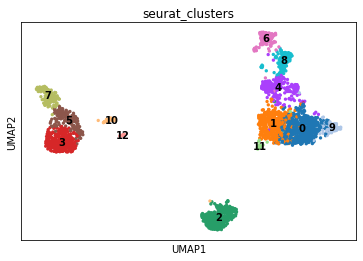

In [19]:
pbmc3k = sc.read_h5ad("../data/pbmc3k.h5ad")
pbmc3k.obs["seurat_clusters"] = sct_clusters

vst_glmgp_3k = vst(
    pbmc3k.X.T,
    gene_names=pbmc3k.var_names.tolist(),
    cell_names=pbmc3k.obs_names.tolist(),
    fit_type="glmgp",
    n_cells=None,
    n_genes=2000,
)
gene_attr = vst_glmgp_3k["gene_attr"]
gene_attr = gene_attr.sort_values(by=["residual_variance"], ascending=False)
highly_variable = gene_attr.index[:3000].tolist()

clip_range = [-np.sqrt(pbmc3k.shape[0]/30), 
              np.sqrt(pbmc3k.shape[0]/30)]

residuals = vst_glmgp_3k["residuals"].T[highly_variable]
residuals = np.clip(residuals, clip_range[0], clip_range[1])
#residuals = 
residuals_centered = residuals - residuals.mean(0)

pbmc3k.obsm["pearson_residuals_glmgp3"] = residuals_centered
X_pca = sc.pp.pca(pbmc3k.obsm["pearson_residuals_glmgp3"])#[highly_variable])
pbmc3k.obsm["X_pca_glmgp3"] = X_pca
sc.pp.neighbors(pbmc3k, use_rep="X_pca_glmgp3")
sc.tl.umap(pbmc3k, min_dist=0.3)
sc.tl.leiden(pbmc3k)
_ = sc.pl.umap(pbmc3k, color=["seurat_clusters"], legend_loc="on data")

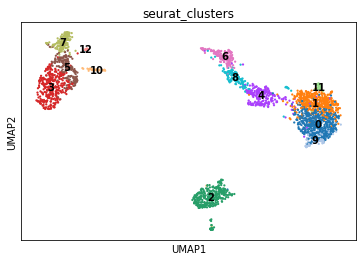

In [12]:
_ = sc.pl.umap(pbmc3k, color=["seurat_clusters"], legend_loc="on data", size=20)

... storing 'seurat_clusters' as categorical


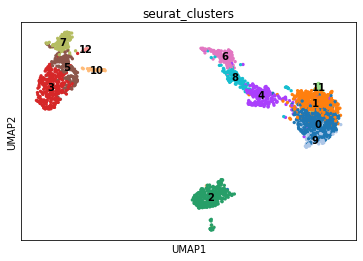

In [15]:
pbmc3k = sc.read_h5ad("../data/pbmc3k.h5ad")
pbmc3k.obs["seurat_clusters"] = sct_clusters


gene_attr = vst_glmgp_3k["gene_attr"]
gene_attr = gene_attr.sort_values(by=["residual_variance"], ascending=False)
highly_variable = gene_attr.index[:3000].tolist()

clip_range = [-np.sqrt(pbmc3k.shape[0])/30, 
              np.sqrt(pbmc3k.shape[0])/30]

residuals = vst_glmgp_3k["residuals"].T[highly_variable]
#residuals = np.clip(residuals, clip_range[0], clip_range[1])
#residuals = 
residuals_centered = residuals #- residuals.mean(0)

pbmc3k.obsm["pearson_residuals_glmgp3"] = residuals#_centered
X_pca = sc.pp.pca(pbmc3k.obsm["pearson_residuals_glmgp3"])#[highly_variable])
pbmc3k.obsm["X_pca_glmgp3"] = X_pca
sc.pp.neighbors(pbmc3k, use_rep="X_pca_glmgp3")
sc.tl.umap(pbmc3k, min_dist=0.3)
sc.tl.leiden(pbmc3k)
_ = sc.pl.umap(pbmc3k, color=["seurat_clusters"], legend_loc="on data")

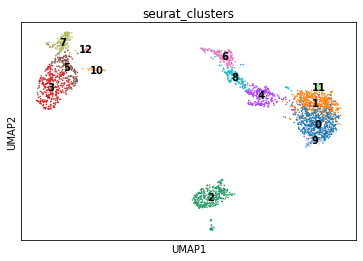

In [16]:
_ = sc.pl.umap(pbmc3k, color=["seurat_clusters"], legend_loc="on data", size=10)

In [ ]:
pbmc3k = sc.read_h5ad("../data/pbmc3k.h5ad")
pbmc3k.obs["seurat_clusters"] = sct_clusters

vst_glmgp_3k = vst(
    pbmc3k.X.T,
    gene_names=pbmc3k.var_names.tolist(),
    cell_names=pbmc3k.obs_names.tolist(),
    fit_type="glmgp",
    n_cells=None,
    n_genes=2000,
)
gene_attr = vst_glmgp_3k["gene_attr"]
gene_attr = gene_attr.sort_values(by=["residual_variance"], ascending=False)
highly_variable = gene_attr.index[:3000].tolist()

clip_range = [-np.sqrt(pbmc3k.shape[0])/30, 
              np.sqrt(pbmc3k.shape[0])/30]

residuals = vst_glmgp_3k["residuals"].T[highly_variable]
#residuals = np.clip(residuals, clip_range[0], clip_range[1])
#residuals = 
residuals_centered = residuals - residuals.mean(0)

pbmc3k.obsm["pearson_residuals_glmgp3"] = residuals_centered
X_pca = sc.pp.pca(pbmc3k.obsm["pearson_residuals_glmgp3"])#[highly_variable])
pbmc3k.obsm["X_pca_glmgp3"] = X_pca
sc.pp.neighbors(pbmc3k, use_rep="X_pca_glmgp3")
sc.tl.umap(pbmc3k, min_dist=0.3)
sc.tl.leiden(pbmc3k)
_ = sc.pl.umap(pbmc3k, color=["seurat_clusters"], legend_loc="on data")

In [7]:
vst_glmgp_3k["residuals"].min().min()

-2.331547798440605

In [49]:
%%capture

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Log Normalization

In [50]:
adata = sc.read_h5ad("../data/pbmc3k.h5ad")
adata.obs["seurat_clusters"] = sct_clusters

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata)
_ = sc.pl.umap(adata, color=["seurat_clusters"], legend_loc="on data", ax=ax1, show=False)

... storing 'seurat_clusters' as categorical


... storing 'seurat_clusters' as categorical


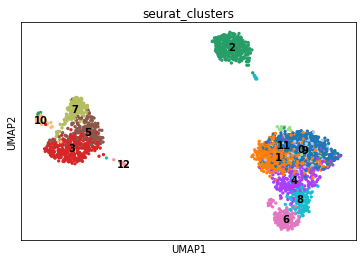

In [40]:
sc.pl.umap(adata, color=["seurat_clusters"], legend_loc="on data")#, ax=ax1, show=False)

# SCT (glmGamPoi)

In [44]:
clip_range = [-np.sqrt(pbmc3k.shape[0])/30, 
              np.sqrt(pbmc3k.shape[0])/30]
clip_range

[-1.7320508075688774, 1.7320508075688774]

... storing 'seurat_clusters' as categorical


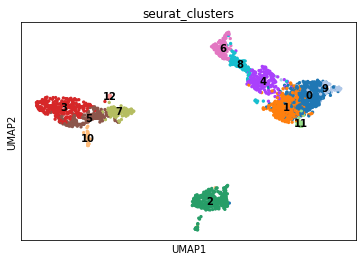

In [92]:
# Input is gene x cell
pbmc3k = sc.read_h5ad("../data/pbmc3k.h5ad")
pbmc3k.obs["seurat_clusters"] = sct_clusters

vst_glmgp_3k = vst(
    pbmc3k.X.T,
    gene_names=pbmc3k.var_names.tolist(),
    cell_names=pbmc3k.obs_names.tolist(),
    fit_type="glmgp",
    n_cells=None,
    n_genes=2000,
)
gene_attr = vst_glmgp_3k["gene_attr"]
gene_attr = gene_attr.sort_values(by=["residual_variance"], ascending=False)
highly_variable = gene_attr.index[:3000].tolist()

clip_range = [-np.sqrt(pbmc3k.shape[0])/30, 
              np.sqrt(pbmc3k.shape[0])/30]

residuals = vst_glmgp_3k["residuals"].T[highly_variable]
#residuals = np.clip(residuals, clip_range[0], clip_range[1])
#residuals = 
residuals_centered = residuals - residuals.mean(0)

pbmc3k.obsm["pearson_residuals_glmgp3"] = residuals_centered
X_pca = sc.pp.pca(pbmc3k.obsm["pearson_residuals_glmgp3"])#[highly_variable])
pbmc3k.obsm["X_pca_glmgp3"] = X_pca
sc.pp.neighbors(pbmc3k, use_rep="X_pca_glmgp3")
sc.tl.umap(pbmc3k, min_dist=0.3)
sc.tl.leiden(pbmc3k)
_ = sc.pl.umap(pbmc3k, color=["seurat_clusters"], legend_loc="on data")#, ax=ax2, show=False)
#_ = sc.pl.umap(pbmc3k, color=["seurat_clusters"], legend_loc="on data", ax=ax2, show=False)

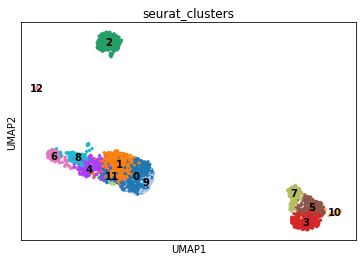

In [93]:
residuals = vst_glmgp_3k["residuals"].T[highly_variable]
residuals = np.clip(residuals, clip_range[0], clip_range[1])
#residuals = 
residuals_centered = residuals - residuals.mean(0)

pbmc3k.obsm["pearson_residuals_glmgp3"] = residuals_centered
X_pca = sc.pp.pca(pbmc3k.obsm["pearson_residuals_glmgp3"])#[highly_variable])
pbmc3k.obsm["X_pca_glmgp3"] = X_pca
sc.pp.neighbors(pbmc3k, use_rep="X_pca_glmgp3")
sc.tl.umap(pbmc3k, min_dist=0.3)
sc.tl.leiden(pbmc3k)
_ = sc.pl.umap(pbmc3k, color=["seurat_clusters"], legend_loc="on data")

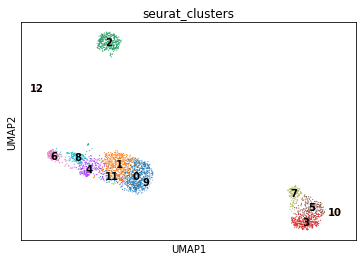

In [97]:
_ = sc.pl.umap(pbmc3k, color=["seurat_clusters"], legend_loc="on data", size=5)

In [94]:
120000/2700

44.44444444444444

In [80]:
residuals_sct = pd.read_csv("/gpfs/commons/home/schoudhary/github/sctransform2_figures/Figures_v3/pbmc3k_seurat_glmgp_scale_data.csv", index_col=0).T


In [82]:
residuals_sct.shape

(2700, 3000)

In [87]:
len(set(highly_variable).intersection(residuals_sct.columns))

2871

In [89]:
highly_variable_common = set(highly_variable).intersection(residuals_sct.columns)

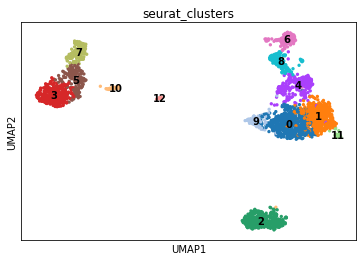

In [88]:
pbmc3k.obsm["pearson_residuals_glmgp3"] = residuals_sct
X_pca = sc.pp.pca(pbmc3k.obsm["pearson_residuals_glmgp3"])#[highly_variable])
pbmc3k.obsm["X_pca_glmgp3"] = X_pca
sc.pp.neighbors(pbmc3k, use_rep="X_pca_glmgp3")
sc.tl.umap(pbmc3k, min_dist=0.3)
sc.tl.leiden(pbmc3k)
_ = sc.pl.umap(pbmc3k, color=["seurat_clusters"], legend_loc="on data")#

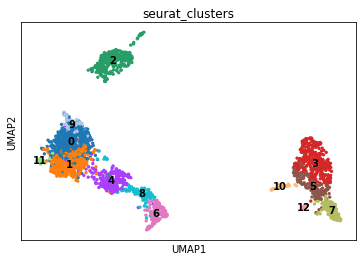

In [91]:
pbmc3k.obsm["pearson_residuals_glmgp3"] = residuals_centered
X_pca = sc.pp.pca(pbmc3k.obsm["pearson_residuals_glmgp3"][highly_variable_common])
pbmc3k.obsm["X_pca_glmgp3"] = X_pca
sc.pp.neighbors(pbmc3k, use_rep="X_pca_glmgp3")
sc.tl.umap(pbmc3k, min_dist=0.3)
sc.tl.leiden(pbmc3k)
_ = sc.pl.umap(pbmc3k, color=["seurat_clusters"], legend_loc="on data")#

... storing 'seurat_clusters' as categorical


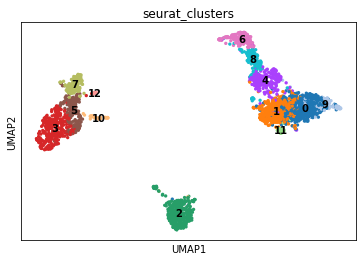

In [75]:
# Input is gene x cell
pbmc3k = sc.read_h5ad("../data/pbmc3k.h5ad")
pbmc3k.obs["seurat_clusters"] = sct_clusters

vst_glmgp_3k = vst(
    pbmc3k.X.T,
    gene_names=pbmc3k.var_names.tolist(),
    cell_names=pbmc3k.obs_names.tolist(),
    fit_type="glmgp",
    n_cells=None,
    n_genes=2000,
)
gene_attr = vst_glmgp_3k["gene_attr"]
gene_attr = gene_attr.sort_values(by=["residual_variance"], ascending=False)
highly_variable = gene_attr.index[:3000].tolist()

clip_range = [-np.sqrt(pbmc3k.shape[0])/30, 
              np.sqrt(pbmc3k.shape[0])/30]

residuals = vst_glmgp_3k["residuals"].T
#residuals = np.clip(residuals, clip_range[0], clip_range[1])
#residuals = 
#residuals_centered = residuals - residuals.mean(0)

pbmc3k.obsm["pearson_residuals_glmgp3"] = residuals#_centered
X_pca = sc.pp.pca(pbmc3k.obsm["pearson_residuals_glmgp3"][highly_variable])
pbmc3k.obsm["X_pca_glmgp3"] = X_pca
sc.pp.neighbors(pbmc3k, use_rep="X_pca_glmgp3")
sc.tl.umap(pbmc3k, min_dist=0.3)
sc.tl.leiden(pbmc3k)
_ = sc.pl.umap(pbmc3k, color=["seurat_clusters"], legend_loc="on data")#, ax=ax2, show=False)
#_ = sc.pl.umap(pbmc3k, color=["seurat_clusters"], legend_loc="on data", ax=ax2, show=False)

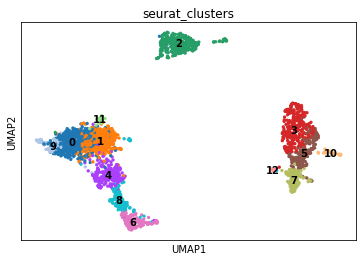

In [79]:
sc.pp.neighbors(pbmc3k, use_rep="X_pca_glmgp3",  n_pcs = 20, n_neighbors = 10)

    
sc.tl.umap(pbmc3k, min_dist=0.3)

sc.tl.leiden(pbmc3k)
_ = sc.pl.umap(pbmc3k, color=["seurat_clusters"], legend_loc="on data")#, ax=ax2, show=False)
#_ = sc.pl.umap(pbmc3k, color=["se

In [70]:
residuals_centered.min().min()

-1.8190200617593857

In [71]:
residuals_centered.max().max()

2.0150620150377456

In [62]:
pbmc3k.obsm["pearson_residuals_glmgp3"][highly_variable].shape

KeyError: 'pearson_residuals_glmgp3'

In [57]:
pbmc3k.shape[1]

32738

In [55]:
clip_range = [-np.sqrt(pbmc3k.shape[1])/30, 
              np.sqrt(pbmc3k.shape[1])/30]
clip_range

[-6.031215097768903, 6.031215097768903]

# SCT (theta_ml)

In [52]:
pbmc3k = sc.read_h5ad("../data/pbmc3k.h5ad")
pbmc3k.obs["seurat_clusters"] = sct_clusters

vst_thetaml_3k = vst(
    pbmc3k.X.T,
    gene_names=pbmc3k.var_names.tolist(),
    cell_names=pbmc3k.obs_names.tolist(),
    fit_type="theta_ml",
    n_cells=None,
    n_genes=2000,
)
gene_attr = vst_thetaml_3k["gene_attr"]
gene_attr = gene_attr.sort_values(by=["residual_variance"], ascending=False)
highly_variable = gene_attr.index[:3000].tolist()
residuals = vst_thetaml_3k["residuals"].T
#residuals = np.clip(residuals, clip_range[0], clip_range[1])

pbmc3k.obsm["pearson_residuals_thetaml"] = residuals
X_pca = sc.pp.pca(pbmc3k.obsm["pearson_residuals_thetaml"][highly_variable])
pbmc3k.obsm["X_pca_thetaml"] = X_pca
sc.pp.neighbors(pbmc3k, use_rep="X_pca_thetaml")
sc.tl.umap(pbmc3k, min_dist=0.3)
sc.tl.leiden(pbmc3k)
_ = sc.pl.umap(pbmc3k, color=["seurat_clusters"], legend_loc="on data", ax=ax3, show=False)

... storing 'seurat_clusters' as categorical


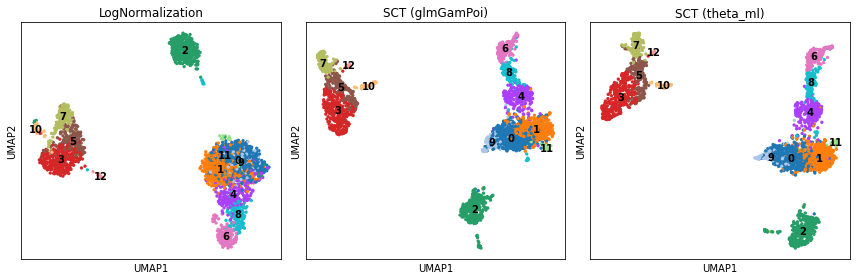

In [53]:
_ = ax1.set_title("LogNormalization")
_ = ax2.set_title("SCT (glmGamPoi)")
_ = ax3.set_title("SCT (theta_ml)")
fig.tight_layout()
fig